## Importing packages

In [65]:
import seaborn as sns
import math
from scipy.signal import find_peaks
import pandas_datareader as web
import numpy as np
import pandas as pd
import talib as ta
import mplfinance as mpf
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

## Matplotlib figure size

In [94]:
from IPython.core.pylabtools import figsize
figsize(16, 10)

## Seaborn figure size

In [2]:
sns.set(rc={'figure.figsize':(16, 10)})

## Sample Dataset

In [3]:
stocks_name = ['VTI', 'VXUS', 'AMZN', 'GOOGL', 'FB', 'ISRG', 'AAPL']

df_stocks = {}
for stock in stocks_name:
    df_ = web.DataReader(stock, data_source='yahoo', start='2010-1-1', end='2020-12-31')
    df_stocks[stock] = df_

In [4]:
df = df_stocks['GOOGL']

In [5]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-10-07,1468.969971,1433.229980,1459.310059,1459.140015,1805400.0,1459.140015
2020-10-08,1488.030029,1465.449951,1465.449951,1483.430054,1303800.0,1483.430054
2020-10-09,1511.849976,1487.000000,1492.859985,1510.449951,1648300.0,1510.449951
2020-10-12,1588.420044,1529.300049,1538.000000,1564.589966,2766500.0,1564.589966
2020-10-13,1585.160034,1574.349976,1577.010010,1579.913208,453190.0,1579.913208


## Window size

In [61]:
window_size = 500
close = df["Close"]
close_windowed = close[-window_size:]

## Finding Peaks

In [85]:
def pick_finder(prices):
    maximas, _ = find_peaks(prices, prominence=10)
    minimas, _ = find_peaks(-prices, prominence=10)
    return maximas, minimas

In [160]:
maximas, minimas = pick_finder(close_windowed)
all_peaks_indices = list(maximas) + list(minimas)

## Bucket Method

In [207]:
def bucketing(prices, bucket_no, peaks=False):
    buckets = dict()
    
    if peaks:
        min_price = int(min(close_windowed[prices]))
        max_price = int(max(close_windowed[prices]))
        threshold = int((max_price - min_price) // bucket_no)
    
    else:
        max_price = int(max(prices))
        min_price = int(min(prices))
        threshold = int((max_price - min_price) // bucket_no)
    
    for index in range(min_price, max_price, threshold):
        buckets[index] = list()

    for price in prices:
        if peaks:
            price = close_windowed[price]
        
        index = int(((price - min_price) // threshold) * threshold + min_price)
        buckets[index].append(price)
        
    buckets_dist = {key: len(value) for key, value in buckets.items()}
    
    return buckets, buckets_dist

In [218]:
buckets, buckets_dist = bucketing(close_windowed, 100)

## Bucket vs Peaks

In [228]:
peak_buckets, peak_dist = bucketing(all_peaks_indices, 100, True)
peak_dist = sorted(peak_dist.items(), key=lambda item: item[1], reverse=True)

In [276]:
horizontal_lines = [i for i, j in peak_dist[:3]]

## Visualizing Results

In [286]:
def visualize(prices, buckets, critical):
    plt.plot(prices.values)
    plt.plot(maximas, prices[maximas], 'o')
    plt.plot(minimas, prices[minimas], 'o')
#     [plt.axhline(y=i, linestyle='--') for i in critical]
    plt.axhline(984)
    plt.legend(['close', 'sell', 'buy', 'critical'])
    plt.show()

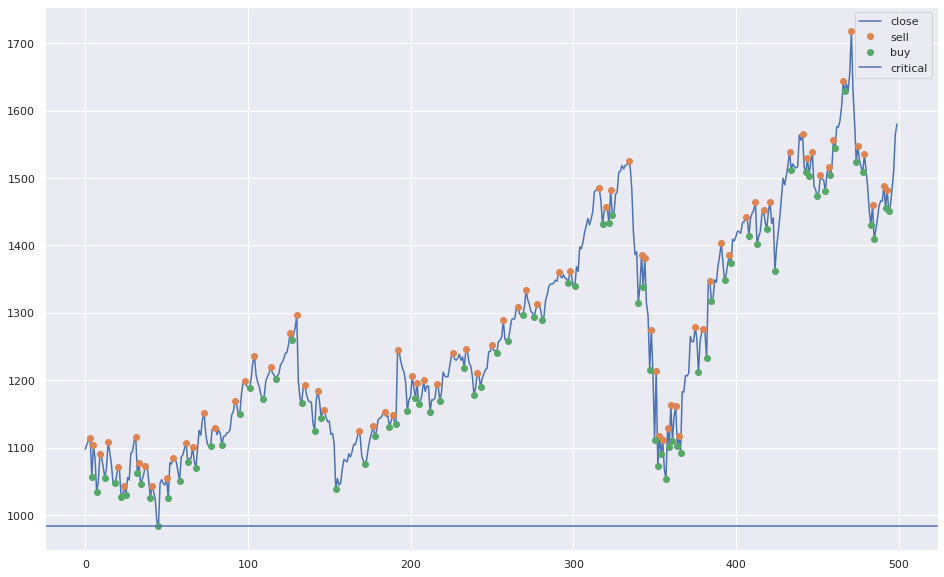

In [287]:
visualize(close_windowed, buckets, horizontal_lines)

## Observations:

1. Gap may implies the S&R! Like 1702, 1628, 984, 1558 and 1019.

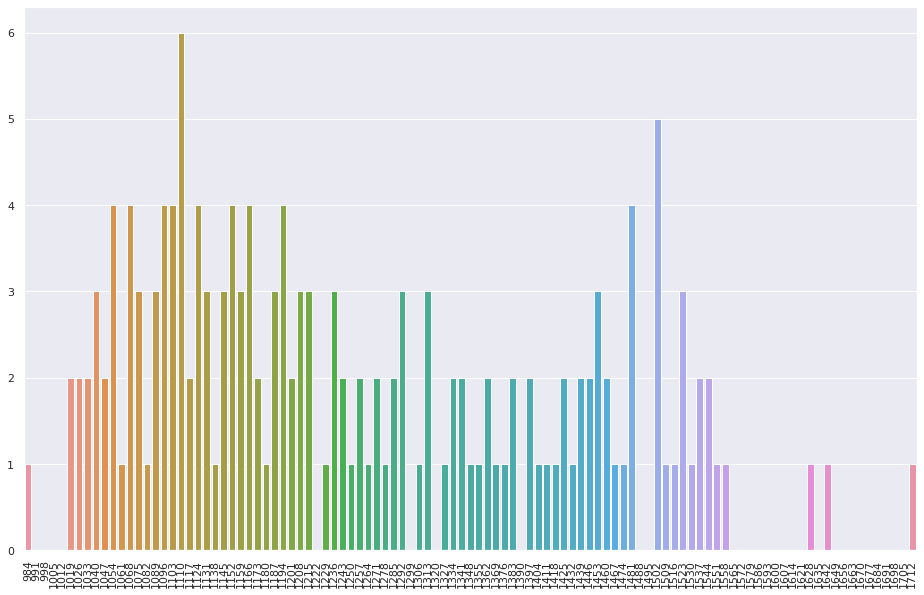

In [279]:
bars = sns.barplot(x=[i for i, j in peak_dist], y=[j for i, j in peak_dist]);
bars.set_xticklabels(bars.get_xticklabels(), rotation=90);